# Gamers don't die, they respawn
----------
This notebook is about simple analysis about the game titles, platforms and sales 

[Kaggle Dataset](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
pd.set_option('display.max_rows',16)
pd.set_option('display.max_columns',100)
plt.style.use('ggplot')

In [2]:
games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
print(games.shape)
games.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# total number of rows and unique rows are not same. Same title must have been released for different platform
len(games.Name.unique())

11563

In [4]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
games.dropna(axis='rows', subset=['Year_of_Release'], inplace=True)
games.Year_of_Release = games.Year_of_Release.astype(np.int64)

----------


## Let's look at the titles which are available for more than one platform ##


----------


> 
- **At first look it seems that Need for Speed: Most Wanted was released on 12 platforms.** 
- **But a closer look reveals that Electronic Arts released games with same name in 2005, 2012 and 2013**

In [6]:
# let's look at the titles which are available for more than one platform
# At first look it seems that Need for Speed: Most Wanted was released on 12 platform, but a closer look reveals that 
# Electronic Arts released games with same name in 2005, 2012 and 2013
multiple_platform_title = games.groupby('Name').agg({'Name':lambda x : len(x) if (len(x) > 1) else None}).dropna()
multiple_platform_title.Name = multiple_platform_title.Name.astype(np.int64)
multiple_platform_title = multiple_platform_title.sort_values(['Name'], ascending=False)
multiple_platform_title.columns = ['Platform_count']
multiple_platform_title

,Platform_count
Name,
Need for Speed: Most Wanted,12
LEGO Marvel Super Heroes,9
FIFA 14,9
Ratatouille,9
Madden NFL 07,8
Angry Birds Star Wars,8
LEGO Star Wars II: The Original Trilogy,8
The LEGO Movie Videogame,8
...,...


In [7]:
cols = ['Name','Platform','Year_of_Release','Publisher']
games.loc[games.Name=='Need for Speed: Most Wanted', cols].sort_values(['Year_of_Release'])

,Name,Platform,Year_of_Release,Publisher
253,Need for Speed: Most Wanted,PS2,2005,Electronic Arts
1591,Need for Speed: Most Wanted,X360,2005,Electronic Arts
1998,Need for Speed: Most Wanted,XB,2005,Electronic Arts
3581,Need for Speed: Most Wanted,GC,2005,Electronic Arts
5973,Need for Speed: Most Wanted,PC,2005,Electronic Arts
6411,Need for Speed: Most Wanted,DS,2005,Electronic Arts
6474,Need for Speed: Most Wanted,GBA,2005,Electronic Arts
523,Need for Speed: Most Wanted,PS3,2012,Electronic Arts
1190,Need for Speed: Most Wanted,X360,2012,Electronic Arts
2048,Need for Speed: Most Wanted,PSV,2012,Electronic Arts


----------


## Sony PS2 and Nintendo DS have almost equal number of titles ##
> 
- Handheld gaming is quite popular based on number of titles
- Based on number of titles Sony, Nintendo and Microsoft are the major contenders

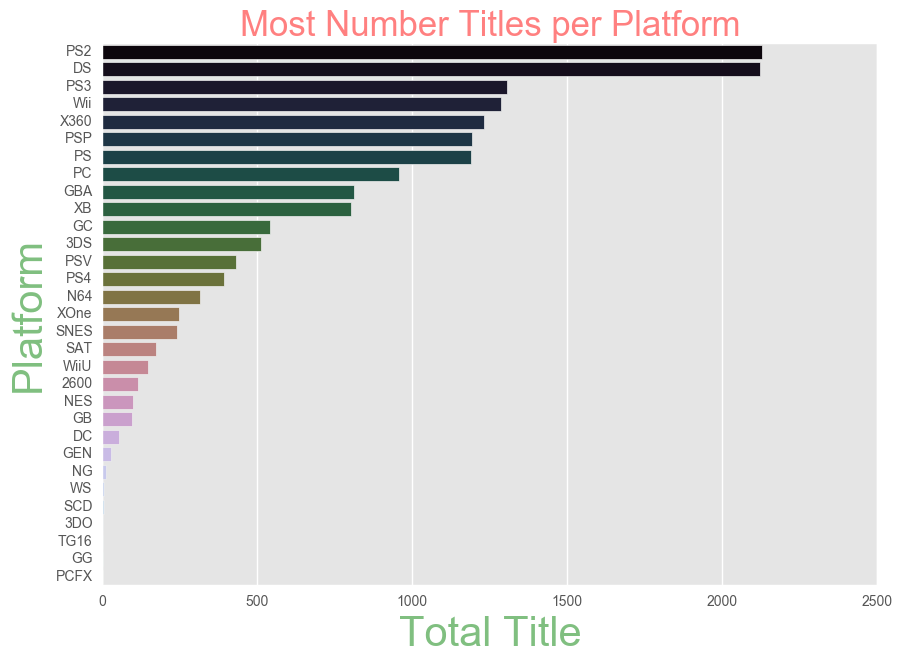

In [8]:
# Sony PS2 and Nintendo DS have almost equal number of titles. Handheld gaming is quite popular based on number of titles
platform_title = games.Platform.value_counts()

plt.subplots(figsize=(10,7))
ax = sns.barplot(x=platform_title , y=platform_title .index, palette='cubehelix')
ax.set_title('Most Number Titles per Platform', color='red', alpha=0.5, size=25)
ax.set_xlabel('Total Title', color='green', alpha=0.5, size=30)
ax.set_ylabel('Platform', color='green', alpha=0.5, size=30)

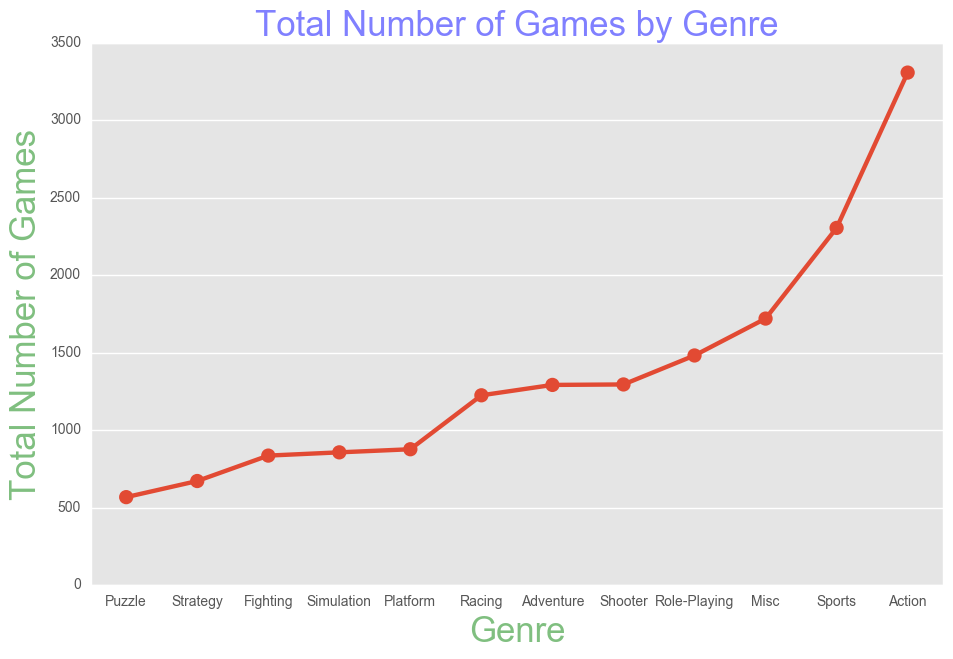

In [9]:
# games based on genre
games_by_genre = games.groupby('Genre').agg({'Genre':len}).sort_values('Genre')
plt.subplots(figsize=(11,7))
ax = sns.pointplot(x=games_by_genre.index, y=games_by_genre.Genre)
ax.set_title('Total Number of Games by Genre', color='blue', size=25, alpha=0.5)
ax.set_xlabel('Genre', color='green', size=25, alpha=0.5)
ax.set_ylabel('Total Number of Games', color='green', size=25, alpha=0.5)

----------


## Total sales based on Genre ##

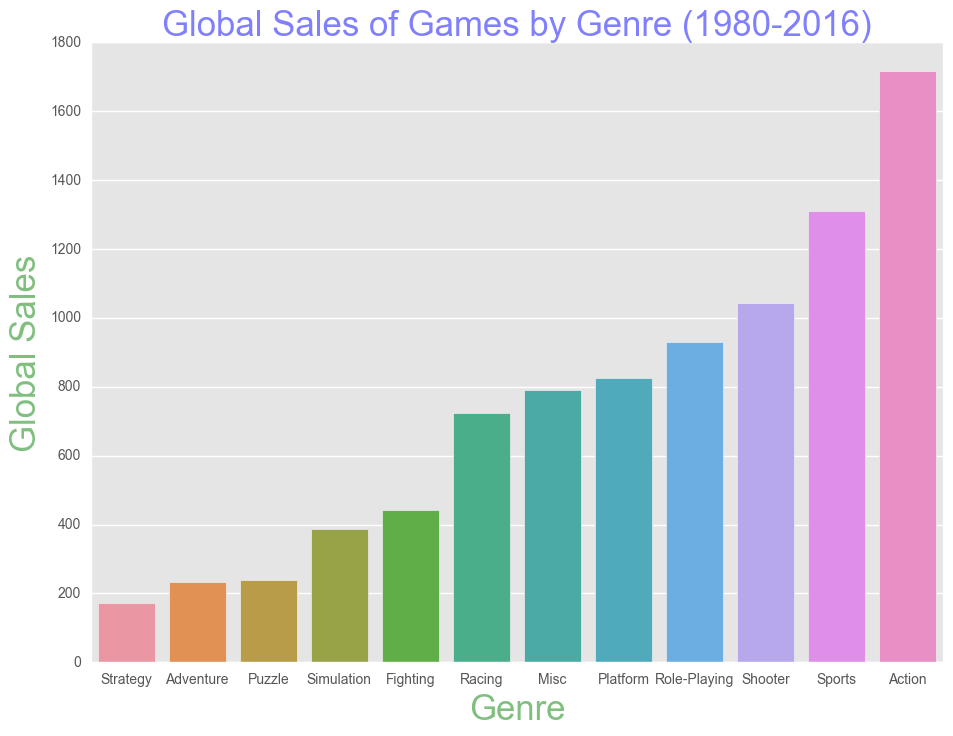

In [10]:
# Total sales based on Genre
global_sales_by_genre = games.groupby('Genre').agg({'Global_Sales':np.sum}).sort_values('Global_Sales')
plt.subplots(figsize=(11,8))
ax = sns.barplot(x=global_sales_by_genre.index, y=global_sales_by_genre.Global_Sales)
ax.set_title('Global Sales of Games by Genre (1980-2016)', color='blue', size=25, alpha=0.5)
ax.set_xlabel('Genre', color='green', size=25, alpha=0.5)
ax.set_ylabel('Global Sales', color='green', size=25, alpha=0.5)

In [11]:
# These games are yet to be released in all the countries
games.loc[games.Year_of_Release > 2016, :]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


----------


## Let's look at Sales by Publisher ##


----------

>  - Nintendo is leading hands down in terms of total sales. 
>  - North America is driving the total sales

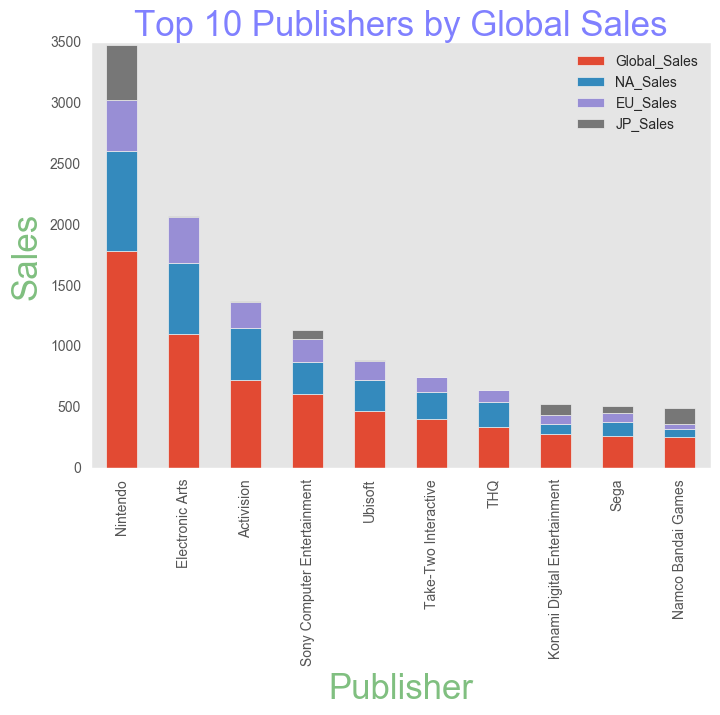

In [12]:
# Let's look at the global sales by publisher
global_sales_publisher = games.pivot_table(index=['Publisher'], values=['Global_Sales','NA_Sales','EU_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['Global_Sales'], ascending=False)
global_sales_publisher = global_sales_publisher[['Global_Sales','NA_Sales','EU_Sales','JP_Sales']]
ax = global_sales_publisher.iloc[0:10,:].plot(kind='bar', stacked=True, grid=False)
ax.set_title('Top 10 Publishers by Global Sales', size=25, color='blue', alpha=0.5)
ax.set_xlabel('Publisher', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)


# Number of Titles released per Year

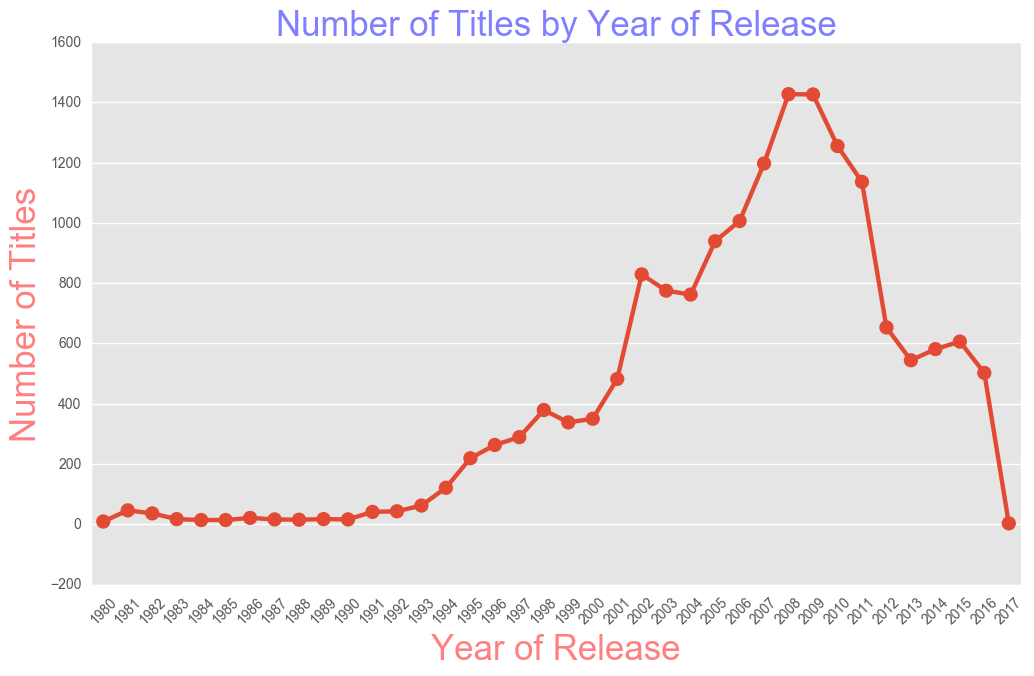

In [13]:
# Number of titles per year

titles_by_year = games.groupby(['Year_of_Release']).agg({'Name':lambda x : len(x) if (len(x) > 1) else None}).dropna()
plt.subplots(figsize=(12,7))
ax = sns.pointplot(x=titles_by_year.index, y=titles_by_year.Name)
g = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Number of Titles by Year of Release', size=25, color='blue', alpha=0.5)
ax.set_xlabel('Year of Release', size=25, color='red', alpha=0.5)
ax.set_ylabel('Number of Titles', size=25, color='red', alpha=0.5)

----------
# Sales figure exploration
----------

>  - PS2 was release in 2000, XBOX and GameCube in 2001. Let's compare the sales of these consoles
>  - Revenue of PS2 games is the highest. This could be attributed to the fact that PS2 was discontinued in 2013 while XBOX in 2009 and GameCube in 2007

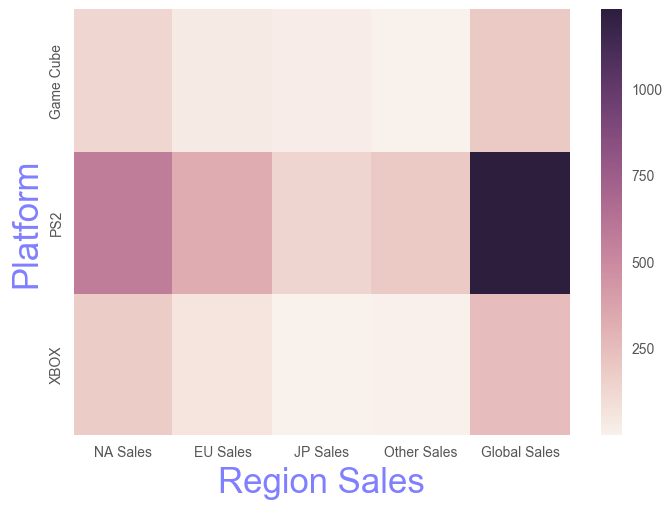

In [14]:
platform_after_2000 = games.loc[(games.Platform == 'PS2') | (games.Platform == 'XB') | (games.Platform == 'GC'),:]
platform_after_2000 = platform_after_2000.groupby(['Platform']).agg(np.sum)

ax = sns.heatmap(platform_after_2000.iloc[:, 1:6])
ax.set_yticklabels(['XBOX', 'PS2', 'Game Cube'])
ax.set_xticklabels(['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales', 'Global Sales'])
ax.set_xlabel('Region Sales', size=25, color='blue', alpha=0.5)
ax.set_ylabel('Platform', size=25, color='blue', alpha=0.5)

**Let's compare the sales of PS2, XBOX, Game Cube from 2001 to 2009.**

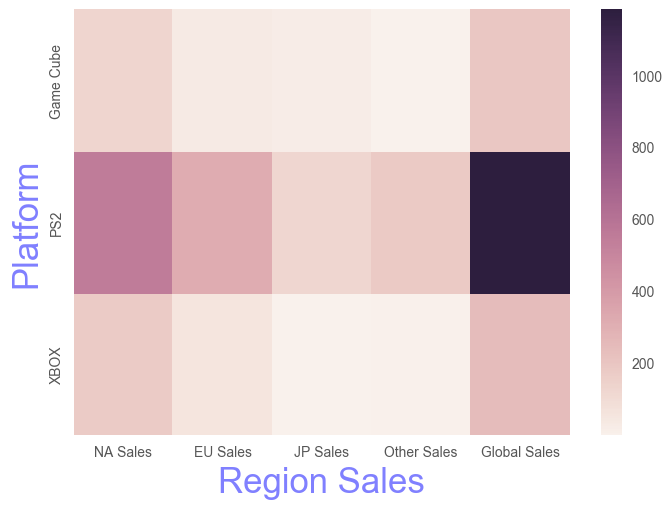

In [15]:
platform_after_2000_2009 = games.loc[((games.Platform == 'PS2') | (games.Platform == 'XB') | (games.Platform == 'GC')) & 
                                     ((games.Year_of_Release >= 2001) & (games.Year_of_Release <= 2009)),:]
platform_after_2000_2009 = platform_after_2000_2009.groupby(['Platform']).agg(np.sum)

ax = sns.heatmap(platform_after_2000_2009.iloc[:, 1:6])
ax.set_yticklabels(['XBOX', 'PS2', 'Game Cube'])
ax.set_xticklabels(['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales', 'Global Sales'])
ax.set_xlabel('Region Sales', size=25, color='blue', alpha=0.5)
ax.set_ylabel('Platform', size=25, color='blue', alpha=0.5)

>  - Based on the output data our hypothesis is wrong that PS2 games sales is more due to its late discontinuation.

# To be continued...